Objective or Mission:

Our objective is to find an prediction model that based on the earlier recorded traffic accidents that would unable us to predict the severity of an accident and the possible delay resulting for the incident.

Groups or publics which could be interested or benifit of such models:

We various groups who could be intersted in usch model.

Authorities: 

Having such model to their disposal they could check which circurmstances are cause of an increased risk of accident.
Once these elements determined where ever possible dispostions could take to take control or to infleunce these circumstance in such way that they become less prone to cause accidents.

This can be done by permanent restrictions or with panels which can be activated or on which the restriction messages can be diffulgated.

To monitor and if needed sanctin the non respect of these restrictions.

Autohroties cam also adapt the road in such way they take into consideration the factors. which influence roadaccidents.

Car Manufacturers: 

The possibility to built into the cars of early warning systems to unnable the driver to adapt his driving style to the expereinced circumtstances on the road.

The Insurance Companies:

They can use the outcome of these models to lobby the leglislator in order to issue new laws to impose dispositions in order to contain the number and severity of the road accidents.

Lobbying as such they would be able to lower the overall risk profile of their insurance portfolio and as such reducing the exposrue of the 'Names' which finance the subscription of the portfolio.

The Consumers:

The can benefit various way of such prediction models:

- The can early warnings to adapt the driving style this by messages on roadside boards, radio messages, text messages on mobile devices.

- Early warning throygh electronic devices wethether or not built into their cars.


In conclusion:

We all have consiberable advantages of such models, less accidents, less casyalties,lower emergency help budgets for the autorities, cheaper insucrance contracts seeing the overall lower risk profile, less time wasted in traffic jams due to rescue operations on road accidents.  

Importing the basic libraries from Panda in order to process our DataFrame.

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

Loading the Data file from the web and assinging to DataFrame in the Notebook.

We will notice that some features are not populated in the copy we are provided with.

Features such as means of mobility, the severity is also limited compared with the origianl file the outcome of the accident.

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

/bin/bash: wget: command not found


In [3]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/Users/marcvloeberghs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


First breef data analyse for the Target feature and creating of Dataframe on which we use for our model.

In [4]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

We notice that the severity code is restricted to two values being 'pro damage' and 'injury'.

In [5]:
coll=pd.DataFrame(df[['WEATHER','ROADCOND','LIGHTCOND','X','Y','SEVERITYCODE','JUNCTIONTYPE','SPEEDING','PEDCOUNT','VEHCOUNT']])
coll[0:5]

,WEATHER,ROADCOND,LIGHTCOND,X,Y,SEVERITYCODE,JUNCTIONTYPE,SPEEDING,PEDCOUNT,VEHCOUNT
0,Overcast,Wet,Daylight,-122.323148,47.703140,2,At Intersection (intersection related),NaN,0,2
1,Raining,Wet,Dark - Street Lights On,-122.347294,47.647172,1,Mid-Block (not related to intersection),NaN,0,2
2,Overcast,Dry,Daylight,-122.334540,47.607871,1,Mid-Block (not related to intersection),NaN,0,3
3,Clear,Dry,Daylight,-122.334803,47.604803,1,Mid-Block (not related to intersection),NaN,0,3
4,Raining,Wet,Daylight,-122.306426,47.545739,2,At Intersection (intersection related),NaN,0,2


We gone check if our DataFrame is fully populated with other words if we have empty fields.

In [6]:
missing_data = coll.isnull()
missing_data.head(5)

,WEATHER,ROADCOND,LIGHTCOND,X,Y,SEVERITYCODE,JUNCTIONTYPE,SPEEDING,PEDCOUNT,VEHCOUNT
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False


In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64



We remove empty fields from our DataFrame.

In [8]:
coll.dropna(inplace=True)

In [9]:
missing_data = coll.isnull()
missing_data.head(5)

,WEATHER,ROADCOND,LIGHTCOND,X,Y,SEVERITYCODE,JUNCTIONTYPE,SPEEDING,PEDCOUNT,VEHCOUNT
24,False,False,False,False,False,False,False,False,False,False
43,False,False,False,False,False,False,False,False,False,False
62,False,False,False,False,False,False,False,False,False,False
123,False,False,False,False,False,False,False,False,False,False
124,False,False,False,False,False,False,False,False,False,False


In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

WEATHER
False    8651
Name: WEATHER, dtype: int64

ROADCOND
False    8651
Name: ROADCOND, dtype: int64

LIGHTCOND
False    8651
Name: LIGHTCOND, dtype: int64

X
False    8651
Name: X, dtype: int64

Y
False    8651
Name: Y, dtype: int64

SEVERITYCODE
False    8651
Name: SEVERITYCODE, dtype: int64

JUNCTIONTYPE
False    8651
Name: JUNCTIONTYPE, dtype: int64

SPEEDING
False    8651
Name: SPEEDING, dtype: int64

PEDCOUNT
False    8651
Name: PEDCOUNT, dtype: int64

VEHCOUNT
False    8651
Name: VEHCOUNT, dtype: int64



We create a new DataFrame with only the atrributes we will be using for training and testing our models.

In [11]:
X = pd.DataFrame(coll[['WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','SPEEDING','X','Y','PEDCOUNT','VEHCOUNT']])

In [12]:
X[0:5]

,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,SPEEDING,X,Y,PEDCOUNT,VEHCOUNT
24,Clear,Dry,Daylight,At Intersection (intersection related),Y,-122.279658,47.553405,0,2
43,Raining,Wet,Dark - Street Lights On,Mid-Block (not related to intersection),Y,-122.337348,47.520472,0,1
62,Clear,Dry,Daylight,Mid-Block (but intersection related),Y,-122.376182,47.499490,0,4
123,Raining,Wet,Daylight,Mid-Block (not related to intersection),Y,-122.333924,47.604678,0,2
124,Clear,Dry,Daylight,At Intersection (intersection related),Y,-122.322187,47.618733,0,2


We identify the unique attributes of each feature in order to requalify our categorical features into numerical features this to enable us to use them in our statistical models.

In [13]:
X['WEATHER'].unique()

array(['Clear', 'Raining', 'Overcast', 'Snowing', 'Fog/Smog/Smoke',
       'Unknown', 'Blowing Sand/Dirt', 'Sleet/Hail/Freezing Rain',
       'Other', 'Severe Crosswind'], dtype=object)

In [14]:
X['ROADCOND'].unique()

array(['Dry', 'Wet', 'Snow/Slush', 'Ice', 'Other', 'Unknown',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [15]:
X['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn',
       'Dark - Street Lights Off', 'Dark - No Street Lights', 'Unknown',
       'Other'], dtype=object)

In [16]:
X['JUNCTIONTYPE'].unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)',
       'Mid-Block (but intersection related)', 'Driveway Junction',
       'At Intersection (but not related to intersection)',
       'Ramp Junction', 'Unknown'], dtype=object)

In [17]:
X['SPEEDING'].unique()

array(['Y'], dtype=object)

Before requalifiing. our features we will replace the missing values by a mean value of the feature if not doing so we will have a error messages which will lead to a biased result especially noticable in the Support Vector Machine models.

In [18]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

le_WEATHER = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)


le_WEATHER = preprocessing.LabelEncoder()
le_WEATHER.fit(['Overcast', 'Raining', 'Clear', 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'])
    
X.iloc[:,0] = le_WEATHER.transform(X.iloc[:,0]) 

le_ROADCOND = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)

le_ROADCOND = preprocessing.LabelEncoder()
le_ROADCOND.fit(['Wet','Dry','Unknown','Snow/Slush','Ice','Other','Sand/Mud/Dirt','Standing Water','Oil'])

X.iloc[:,1] = le_ROADCOND.transform(X.iloc[:,1])

le_LIGHTCOND = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)

le_LIGHTCOND = preprocessing.LabelEncoder()
le_LIGHTCOND.fit(['Daylight','Dark - Street Lights On','Dark - No Street Lights','Unknown','Dusk','Dawn','Dark - Street Lights Off','Other','Dark - Unknown Lighting'])

X.iloc[:,2] = le_LIGHTCOND.transform(X.iloc[:,2]) 

le_JUNCTIONTYPE = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)

le_JUNCTIONTYPE = preprocessing.LabelEncoder()
le_JUNCTIONTYPE.fit(['At Intersection (intersection related)','Mid-Block (not related to intersection)','Driveway Junction','At Intersection (but not related to intersection)','Mid-Block (but intersection related)','Ramp Junction','Unknown'])

X.iloc[:,3] = le_JUNCTIONTYPE.transform(X.iloc[:,3]) 



le_SPEEDING = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)


le_SPEEDING = preprocessing.LabelEncoder()
le_SPEEDING.fit(['Y'])
    
X.iloc[:,4] = le_SPEEDING.transform(X.iloc[:,4]) 



X[0:5]


,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,SPEEDING,X,Y,PEDCOUNT,VEHCOUNT
24,1,0,5,1,0,-122.279658,47.553405,0,2
43,6,8,2,4,0,-122.337348,47.520472,0,1
62,1,0,5,3,0,-122.376182,47.499490,0,4
123,6,8,5,4,0,-122.333924,47.604678,0,2
124,1,0,5,1,0,-122.322187,47.618733,0,2


In [19]:
y = coll['SEVERITYCODE'].values
y[0:5]

array([2, 2, 1, 1, 2])

We standardize our DataFrame before splitting up in training and testing part.

In [20]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.00335094, -1.00400776,  0.82582966, -1.6660193 ,  0.        ,
         1.64020861, -0.92612246, -0.08753967,  0.14651608],
       [ 1.01901369,  1.04752366, -1.0135762 ,  0.75019746,  0.        ,
        -0.18112018, -1.43939895, -0.08753967, -1.01954702],
       [-1.00335094, -1.00400776,  0.82582966, -0.05520813,  0.        ,
        -1.40716701, -1.76640048, -0.08753967,  2.47864226],
       [ 1.01901369,  1.04752366,  0.82582966,  0.75019746,  0.        ,
        -0.07300448, -0.12701205, -0.08753967,  0.14651608],
       [-1.00335094, -1.00400776,  0.82582966, -1.6660193 ,  0.        ,
         0.29753764,  0.09205008, -0.08753967,  0.14651608]])

We set up two sets one being the training set which equals 80% of attributes and a test set consisting of 20|% of the attributes.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6920, 9) (6920,)
Test set: (1731, 9) (1731,)


Our first prediction model : K- Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

We try to determine which k-value give the most accutarate prediction model for K-Neighbors (k- values 1 to 11).

In [23]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.55285962, 0.59965338, 0.57827845, 0.6169844 , 0.59329867,
       0.60254188, 0.59618718, 0.6140959 , 0.59849798, 0.6140959 ])

Visualization of the accuracy of our model with the different K-values.

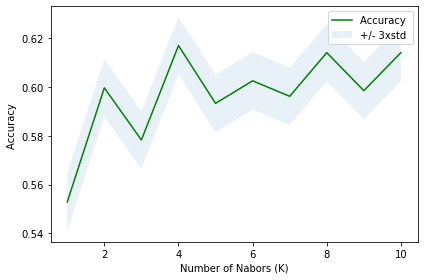

In [24]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [25]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6169844020797227 with k= 4


Report of the performance of our model with a k-value = 4.

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[2,1]))

[[143 512]
 [156 920]]


Confusion matrix, without normalization
[[143 512]
 [156 920]]


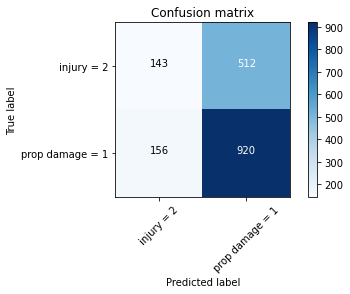

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['injury = 2','prop damage = 1'],normalize= False,  title='Confusion matrix')

In [28]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.64      0.86      0.73      1076
           2       0.48      0.22      0.30       655

    accuracy                           0.61      1731
   macro avg       0.56      0.54      0.52      1731
weighted avg       0.58      0.61      0.57      1731



In [29]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.5793450881612091

In [30]:
yhat_prob = neigh.predict_proba(X_test)
yhat_prob

array([[0.7, 0.3],
       [0.1, 0.9],
       [0.7, 0.3],
       ...,
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4]])

In [31]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.8585115750400434

Our second prediction model : Decision Tree Model 

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [33]:
collTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
collTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [34]:
collTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
predTree = collTree.predict(X_testset)

In [36]:
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.639060092449923


Report of the performance of our Decision Tree model

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[2,1]))

[[143 512]
 [156 920]]


Confusion matrix, without normalization
[[143 512]
 [156 920]]


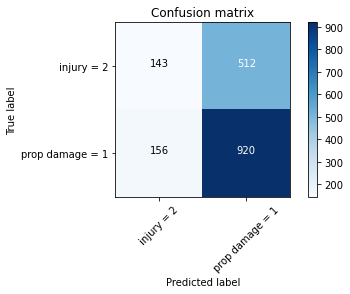

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['injury = 2','prop damage = 1'],normalize= False,  title='Confusion matrix')

In [39]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.64      0.86      0.73      1076
           2       0.48      0.22      0.30       655

    accuracy                           0.61      1731
   macro avg       0.56      0.54      0.52      1731
weighted avg       0.58      0.61      0.57      1731



In [40]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.5793450881612091

In [41]:
yhat_prob = neigh.predict_proba(X_test)
yhat_prob

array([[0.7, 0.3],
       [0.1, 0.9],
       [0.7, 0.3],
       ...,
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4]])

In [42]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.8585115750400434

Our Third prediction model : Logistic Regression

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6920, 9) (6920,)
Test set: (1731, 9) (1731,)


In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [47]:
LR

LogisticRegression(C=0.01, solver='liblinear')

In [48]:
yhat = LR.predict(X_test)
yhat

array([1, 2, 1, ..., 1, 1, 1])

In [49]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.59, 0.41],
       [0.09, 0.91],
       [0.56, 0.44],
       ...,
       [0.65, 0.35],
       [0.68, 0.32],
       [0.65, 0.35]])

Report of the performance of our Logistic Regression Model

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[2,1]))

[[  43  612]
 [  26 1050]]


Confusion matrix, without normalization
[[  43  612]
 [  26 1050]]


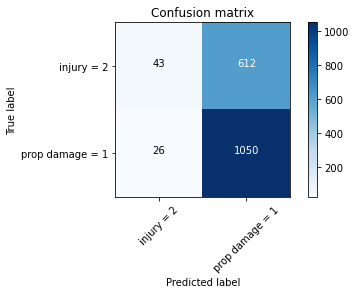

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['injury = 2','prop damage = 1'],normalize= False,  title='Confusion matrix')

In [52]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.63      0.98      0.77      1076
           2       0.62      0.07      0.12       655

    accuracy                           0.63      1731
   macro avg       0.63      0.52      0.44      1731
weighted avg       0.63      0.63      0.52      1731



In [53]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.65198578565258

In [54]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.6220379146919431

Our Fourth prediction model : Support Vector Machine with kernel = 'rbf'

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6920, 9) (6920,)
Test set: (1731, 9) (1731,)


In [56]:
from sklearn.metrics import f1_score

metrics.f1_score(y_test, yhat, labels=np.unique(yhat))

0.7669831994156319

In [57]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf').fit(X_train, y_train) 

In [58]:
yhat = svm.predict(X_test)
yhat [0:5]

array([1, 2, 1, 1, 1])

Checking if our DataFrame is fully populated , if no unlabeled elements remain in order to avoid bias.

In [59]:
set(y_test)-set(yhat)

set()

In [60]:
metrics.f1_score(y_test, yhat, average='weighted', labels=np.unique(yhat))

0.5181642619245777

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(confusion_matrix(y_test, yhat, labels=[2,1]))

              precision    recall  f1-score   support

           1       0.63      0.97      0.76      1076
           2       0.56      0.06      0.12       655

    accuracy                           0.63      1731
   macro avg       0.59      0.52      0.44      1731
weighted avg       0.60      0.63      0.52      1731

Confusion matrix, without normalization
[[  42  613]
 [  33 1043]]
[[  42  613]
 [  33 1043]]


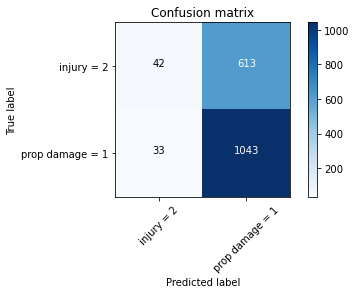

In [63]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['injury = 2','prop damage = 1'],normalize= False,  title='Confusion matrix')

In [64]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.6175251628182357

In [65]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.65198578565258

As last model we will be using a Support Vector Machine with another kernel = 'Lineair'

In [66]:
svm2=SVC(kernel='linear').fit(X_train, y_train) 
yhat2 = svm2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2))

Avg F1-score: 0.4922
Jaccard score: 0.6259


In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.63      1.00      0.77      1076
           2       1.00      0.02      0.04       655

    accuracy                           0.63      1731
   macro avg       0.81      0.51      0.40      1731
weighted avg       0.77      0.63      0.49      1731

Confusion matrix, without normalization
[[  12  643]
 [   0 1076]]


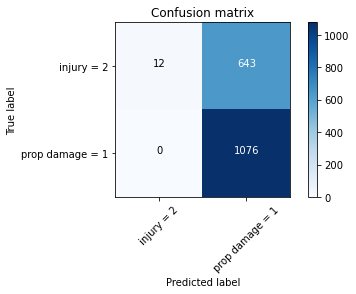

In [68]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[2,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['injury = 2','prop damage = 1'],normalize= False,  title='Confusion matrix')

In [69]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.65198578565258

In [70]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat2)

0.6259453170447935

Comments on the obtained results:


Going through the results obtained with our various models , the conclsuion is anything but joyfull.

If we compare the accuracy of the F1 score using the weighted average as comparator, the conclusion is rather saddening in this sense that our ML models we have being using or tossing a coin in order to predict the right outcome is of the same order being 50%.

Before looking to adapt our ML models , I am personally convinced that we are missing vital data in the DataFrame we are using.

Starting with our target value being binary 'injury' or 'prop damage' , there were initally a more elaborateed set of attributes used.

But more vital information is missing for instance wethether we are dealing with an accident with  pedesterians , bicycles, motorbike, cars.

Also the outcome of an accident such as fatal or not could facilitate the qualification of a accident.

A final comment, I am not in a postion to be able to determine the causes but our intial size of our DataFrame consist of 194673 attributes and after preparing the dataset for our models the size is reduced to 8651 attributes with other words 96%  of our observations are lost for usage due to missing attributes.

The loss of 96% percent of our observations has its toll on the performance of our models, as known the larger your sample population the more accuracy can be expected. 

So final comment, are these 8651 observations we use for our ML models reprensative enough to make predictions, in the acutal state of this project , tossing up coin would be the most economical way to seek an answer to our question about the prediction of the outcome of an accident. 

Final conclusion:

As first step we have to go back to our data in order to be able to add signifiant features which would improve the performance of our models, if this doesn't resolves the predactiblity of our models taking inroads to improve reporting to have more complete dataframes will be a  second step.
If these steps wouldn't help out then the next step would  be to evalaute if the information we collect really adequate is and if so then how effective our reporting is in function of our prediction models.